In [2]:
import numpy as np
import pandas as pd
import sklearn.mixture as mix
from sklearn.cluster import KMeans

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DayLocator
%matplotlib inline

import seaborn as sns
from tqdm import tqdm

In [3]:
df_analysis = pd.read_csv('data/total_analysis_df.csv')
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])
df_analysis = df_analysis.set_index('Date')

In [5]:
df_analysis.head()

,Confirmed_new_US,Deaths_new_US,retail_US,retail_US_diff,grocery_US,grocery_US_diff,parks_US,parks_US_diff,transit_google_US,transit_google_US_diff,...,sbj18_count_weighted,sbj18_favourites_weighted,sbj18_retweet_weighted,sbj18_popularity_weighted,sbj18_engagement_weighted,sbj19_count_weighted,sbj19_favourites_weighted,sbj19_retweet_weighted,sbj19_popularity_weighted,sbj19_engagement_weighted
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-12,393.0,4.0,10.019729,0.298444,22.720821,11.653862,27.285120,-7.292266,3.783693,-0.742964,...,30.366361,514516.320753,45.712579,517724.963144,783.021048,27.048881,517553.563224,32.312411,519821.625393,539.441568
2020-03-13,565.0,8.0,4.074367,-5.945362,25.283834,2.563012,12.217885,-15.067236,-0.098021,-3.881714,...,51.415687,836270.520446,48.754029,839692.647253,968.619367,59.714706,798435.590596,48.365220,801830.426310,1060.201632
2020-03-14,662.0,7.0,-2.160826,-6.235193,18.225341,-7.058493,12.997491,0.779606,-1.399180,-1.301159,...,30.026926,412672.078334,35.293293,415149.373605,498.918563,33.665548,952106.469811,54.937148,955962.600118,529.734021
2020-03-15,676.0,6.0,-2.062134,0.098692,16.525736,-1.699605,17.774478,4.776987,-2.441142,-1.041962,...,34.589109,614574.186140,39.893033,617374.344831,511.806045,37.896720,675710.595514,45.739917,678921.156824,733.813344
2020-03-16,872.0,14.0,-1.841855,0.220279,24.997330,8.471594,8.546993,-9.227485,-7.109609,-4.668467,...,41.989440,500040.190409,36.960089,502634.480863,650.507595,39.237705,546805.424915,39.925328,549607.850484,705.573526


In [6]:
df_analysis.tail()

,Confirmed_new_US,Deaths_new_US,retail_US,retail_US_diff,grocery_US,grocery_US_diff,parks_US,parks_US_diff,transit_google_US,transit_google_US_diff,...,sbj18_count_weighted,sbj18_favourites_weighted,sbj18_retweet_weighted,sbj18_popularity_weighted,sbj18_engagement_weighted,sbj19_count_weighted,sbj19_favourites_weighted,sbj19_retweet_weighted,sbj19_popularity_weighted,sbj19_engagement_weighted
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-26,26884.0,1161.0,-33.135332,1.216222,-11.649825,-3.289681,22.830202,-11.878009,-34.422600,-4.573702,...,12.432973,132929.204468,6.160861,133361.645639,202.374392,15.486443,185121.330189,48.118970,188498.881190,139.588872
2020-04-27,22086.0,1237.0,-27.055889,6.079443,-8.953819,2.696006,15.140130,-7.690072,-30.230077,4.192524,...,13.487676,124307.132909,148.172517,134707.609685,186.586733,23.926292,340826.138121,49.214442,344280.582134,196.658058
2020-04-28,24429.0,2204.0,-26.053148,1.002741,-6.233141,2.720678,28.074048,12.933918,-26.616070,3.614007,...,17.416044,249711.426736,20.532276,251152.621549,324.970208,22.521254,285403.919010,18.818109,286724.793578,236.970269
2020-04-29,25904.0,2536.0,-25.130129,0.923019,-5.217993,1.015148,22.367556,-5.706491,-26.340424,0.275646,...,14.242940,153776.131097,27.293030,155691.874490,207.185148,23.230919,293037.983322,26.912168,294926.993422,269.550307
2020-04-30,29674.0,2083.0,-26.035268,-0.905139,-4.435265,0.782728,16.309038,-6.058518,-27.737516,-1.397092,...,11.781765,122135.427235,12.671324,123024.848652,191.152475,25.257362,353330.128386,38.766560,356051.218057,251.971274


In [11]:
ft_cols1 = ['retail_US', 'grocery_US', 'parks_US', 'transit_google_US', 'work_US', 
            'residents_US', 'driving_US', 'transit_apple_US', 'sret']
ft_cols2 = ['sbj' + str(i) + '_count' for i in range(20)] + ['sret']
ft_cols3 = ['sbj' + str(i) + '_engagement' for i in range(20)] + ['sret']
ft_cols4 = ['cluster_' + s + '_engagement' 
           for s in['home', 'sanitisers', 'isolation', 'distance', 'family', 'masks', 'washhands', 'workhome']] + ['sret']
ft_cols5 = ['cluster_' + s + '_popularity' 
           for s in['home', 'sanitisers', 'isolation', 'distance', 'family', 'masks', 'washhands', 'workhome']] + ['sret']
ft_cols = ['cluster_' + s + '_count' 
           for s in['home', 'sanitisers', 'isolation', 'distance', 'family', 'masks', 'washhands', 'workhome']] # + ['sret']

In [14]:
ft_cols0 = ['Confirmed_new_US', 'Deaths_new_US'] + ft_cols1[:-1] + ['walking_US'] + ft_cols + \
           ['cluster_health_count', 'cluster_total_count'] + ft_cols2[:-1] + ft_cols3[:-1] + \
           ['sbj' + str(i) + '_popularity' for i in range(20)] + ft_cols4[:-1] + ft_cols5[:-1]

In [17]:
df_analysis1 = df_analysis[ft_cols0].dropna()
df_analysis1 = df_analysis1.assign(sret=lambda x: np.log(x['Confirmed_new_US']/x['Confirmed_new_US'].shift(1)))

In [21]:
select = df_analysis1.loc[:].dropna()

(array([3., 2., 0., 0., 0., 0., 1., 1., 0., 1.]),
 array([ 22. ,  95.1, 168.2, 241.3, 314.4, 387.5, 460.6, 533.7, 606.8,
        679.9, 753. ]),
 <a list of 10 Patch objects>)

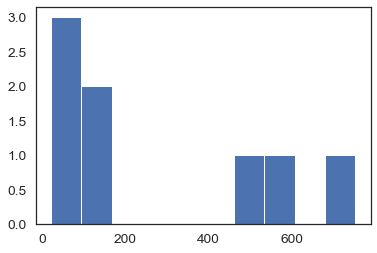

In [39]:
plt.hist(X[7])

Means and vars of each hidden state
0th hidden state
mean =  [367.77490635   8.34574589  26.38284643 137.53336425  24.92128976
  81.41925168  41.77257656 417.69256337]
var =  [12347.62274708    37.46765744   181.20531462  1042.27791762
    68.23662213   629.94391924  1447.88894253 16250.0967411 ]

1th hidden state
mean =  [839.52669177  14.55294897  69.03615006 391.70982981  47.65754205
  78.11833598  76.03308325 927.51491937]
var =  [23930.94670927    30.80318302   865.35353574 19085.00908488
   195.51077161  2179.33232971   757.64957469 28471.53911144]

2th hidden state
mean =  [467.6  20.8  88.6 557.8  51.6  24.  108.6 591.4]
var =  [ 4809.040001    18.160001   374.640001  4233.360001    38.640001
   218.000001    52.240001 11287.440001]



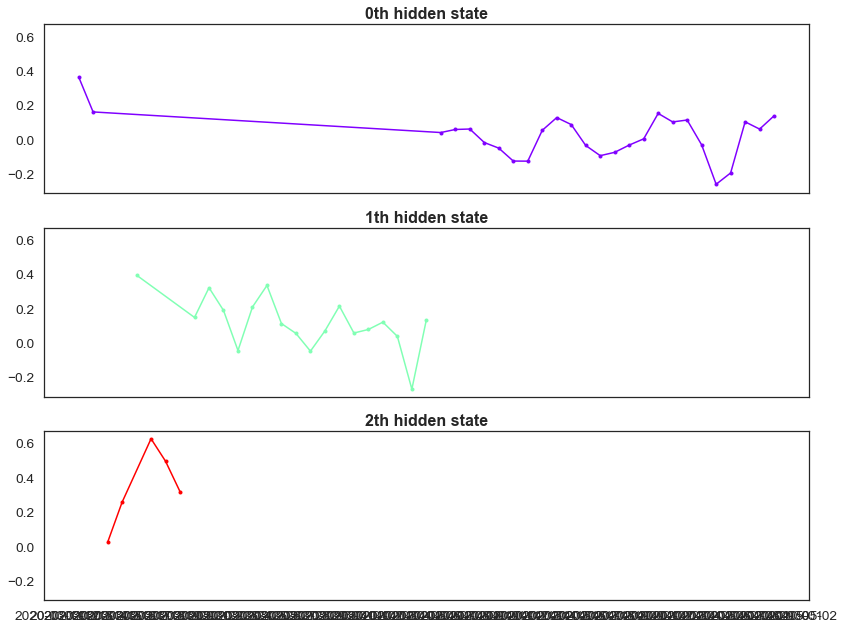

In [29]:
col = 'sret'
X = select[ft_cols].values

model = mix.GaussianMixture(n_components=3, covariance_type="full", n_init=100, random_state=2).fit(X)

# model = KMeans(n_clusters=3, n_init=100, random_state=2).fit(X)

hidden_states = model.predict(X)

print("Means and vars of each hidden state")
for i in range(model.n_components):  # for i in range(model.n_clusters):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
               'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))  # n_clusters
colors = cm.rainbow(np.linspace(0, 1, model.n_components))  # n_clusters

for i, (ax, color) in enumerate(zip(axs, colors)):
    mask = hidden_states == i
    ax.plot_date(select.index.values[mask],
                 select[col].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    ax.xaxis.set_major_locator(DayLocator())
#     ax.xaxis.set_minor_locator(DayLocator())
#     sns.despine(offset=0)

plt.tight_layout()
fig.savefig('Hidden Markov (Mixture) Model_Regime Subplots.png')

In [182]:
sns.set(font_scale=1.0)
states = (pd.DataFrame(hidden_states, columns=['states'], index=select.index)
          .join(select, how='inner')
          .assign(mkt_cret=select.sret.cumsum()))
          # .reset_index(drop=False)
          # .rename(columns={'index':'Date'}))
# print(states.head())
# states['Date'] = pd.to_datetime(states['Date'])

In [65]:
states.head()

,states,Confirmed_new_US,Deaths_new_US,mean_retail_US,mean_grocery_US,mean_parks_US,mean_transit_google_US,mean_work_US,mean_residents_US,mean_driving_US,...,cluster_home_tweet_popularity_mean,cluster_sanitasers_tweet_popularity_mean,cluster_isolation_tweet_popularity_mean,cluster_distance_tweet_popularity_mean,cluster_family_tweet_popularity_mean,cluster_masks_tweet_popularity_mean,cluster_washhands_tweet_popularity_mean,cluster_workhome_tweet_popularity_mean,sret,mkt_cret
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,0,565.0,8.0,4.074367,25.283834,12.217885,-0.098021,-3.915005,2.145358,134.974862,...,1.228910e+06,211005.725053,6.072387e+05,3.938757e+06,4.481425e+05,59121.575018,2.101190e+06,1.356884e+06,0.363016,0.363016
2020-03-14,0,662.0,7.0,-2.160826,18.225341,12.997491,-1.399180,-1.260550,2.767061,123.772279,...,8.664328e+05,337910.383345,4.245277e+05,3.448952e+06,9.511396e+05,69072.191673,1.562040e+06,1.796456e+06,0.158440,0.521456
2020-03-15,2,676.0,6.0,-2.062134,16.525736,17.774478,-2.441142,-5.187639,3.005189,98.388022,...,8.178874e+06,101172.000000,9.211752e+05,9.534835e+06,5.804650e+05,42612.150036,2.061203e+06,8.699835e+06,0.020928,0.542383
2020-03-16,2,872.0,14.0,-1.841855,24.997330,8.546993,-7.109609,-14.171961,6.015543,97.594064,...,5.165416e+06,287936.191673,2.271678e+06,6.226658e+06,8.885903e+05,94268.383345,1.406894e+06,5.579335e+06,0.254596,0.796980
2020-03-17,1,1291.0,21.0,-13.998346,16.178268,17.881977,-9.725961,-20.609872,9.028516,91.886633,...,7.506519e+06,83725.766690,1.438419e+06,7.049437e+06,1.135508e+06,147639.150036,1.576751e+06,8.695398e+06,0.392383,1.189363


In [105]:
states.loc[states.index==pd.to_datetime('2020-03-14 00:00:01')].index = states.loc[states.index==pd.to_datetime('2020-03-14 00:00:01')].index + pd.to_timedelta('23:59:58')

In [110]:
states.loc[states.index==pd.to_datetime('2020-03-14 00:00:01')].index = states.loc[states.index==pd.to_datetime('2020-03-14 00:00:01')].index + pd.to_timedelta('23:59:58')

In [183]:
states1 = states

In [184]:
states.drop(pd.to_datetime('2020-03-17 00:00:00'), inplace=True)

In [185]:
states = states.reset_index(drop=False)

In [187]:
states['Date']= states['Date'] + pd.to_timedelta('00:00:01')

In [193]:
states['Date'][states['Date']==pd.to_datetime('2020-04-06 00:00:01')] = pd.to_datetime('2020-04-05 00:00:02')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
states = states.set_index('Date')

In [197]:
states1

,states,Confirmed_new_US,Deaths_new_US,mean_retail_US,mean_grocery_US,mean_parks_US,mean_transit_google_US,mean_work_US,mean_residents_US,mean_driving_US,...,cluster_home_tweet_popularity_mean,cluster_sanitasers_tweet_popularity_mean,cluster_isolation_tweet_popularity_mean,cluster_distance_tweet_popularity_mean,cluster_family_tweet_popularity_mean,cluster_masks_tweet_popularity_mean,cluster_washhands_tweet_popularity_mean,cluster_workhome_tweet_popularity_mean,sret,mkt_cret
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,0,565.0,8.0,4.074367,25.283834,12.217885,-0.098021,-3.915005,2.145358,134.974862,...,1.228910e+06,211005.725053,6.072387e+05,3.938757e+06,448142.508969,5.912158e+04,2.101190e+06,1.356884e+06,0.363016,0.363016
2020-03-14,0,662.0,7.0,-2.160826,18.225341,12.997491,-1.399180,-1.260550,2.767061,123.772279,...,8.664328e+05,337910.383345,4.245277e+05,3.448952e+06,951139.575731,6.907219e+04,1.562040e+06,1.796456e+06,0.158440,0.521456
2020-03-15,2,676.0,6.0,-2.062134,16.525736,17.774478,-2.441142,-5.187639,3.005189,98.388022,...,8.178874e+06,101172.000000,9.211752e+05,9.534835e+06,580464.983488,4.261215e+04,2.061203e+06,8.699835e+06,0.020928,0.542383
2020-03-16,2,872.0,14.0,-1.841855,24.997330,8.546993,-7.109609,-14.171961,6.015543,97.594064,...,5.165416e+06,287936.191673,2.271678e+06,6.226658e+06,888590.325196,9.426838e+04,1.406894e+06,5.579335e+06,0.254596,0.796980
2020-03-18,2,2410.0,26.0,-19.725393,11.899973,21.461635,-12.260672,-24.362731,10.715779,88.882909,...,3.718109e+06,107502.175160,7.193332e+05,5.155079e+06,291315.408470,8.937668e+04,1.079209e+06,5.236097e+06,0.624210,1.813572
2020-03-19,2,3948.0,52.0,-25.517692,8.453027,6.984633,-18.304437,-27.158440,12.884459,85.092611,...,4.891081e+06,116375.025125,1.309080e+06,8.138156e+06,714691.733666,7.314163e+05,1.228924e+06,7.163208e+06,0.493582,2.307155
2020-03-20,2,5417.0,55.0,-29.674992,7.741433,11.571469,-21.047294,-28.436200,14.498103,92.608476,...,7.722293e+06,49988.066762,1.343165e+06,3.919146e+06,613054.175160,4.273409e+05,1.389948e+06,1.058600e+07,0.316333,2.623488
2020-03-21,1,6271.0,68.0,-35.380718,2.596757,17.574932,-20.506671,-20.492790,10.339708,82.414437,...,2.001137e+07,82233.533381,3.327457e+06,7.961107e+06,305502.600143,7.106775e+05,1.613641e+06,1.989080e+07,0.146394,2.769881
2020-03-22,1,8631.0,110.0,-37.649501,-7.872665,12.007741,-27.803183,-27.099418,9.465376,63.230682,...,1.625042e+07,136369.216797,3.049806e+06,9.860732e+06,616076.725053,1.514914e+06,1.431644e+06,1.742306e+07,0.319425,3.089306


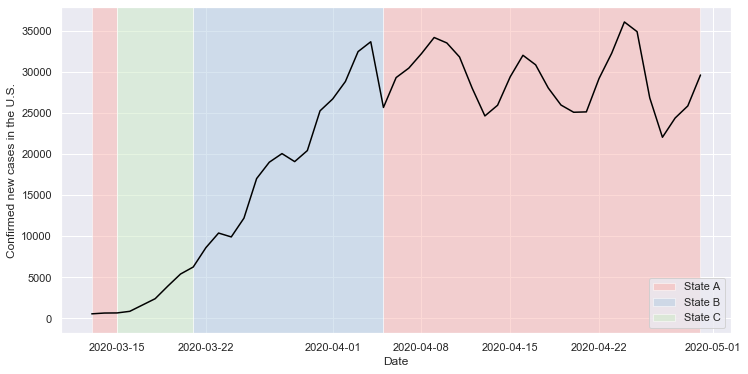

In [205]:
import matplotlib.transforms as mtransforms
cmap = plt.get_cmap('Pastel1')
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed new cases in the U.S.')
ax.set_title('')
ax.grid(True)

ax.plot(states1.Confirmed_new_US, color='black')
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
name=['A','B','C']
for i, color in enumerate(cmap([0, 1, 2])):
    ax.fill_between(states.index,  0, 1, where=states['states']==i, facecolor=color, alpha = 0.5, transform=trans, label = 'State {n}'.format(n=name[i]))
    ax.legend(loc = 'lower right')

plt.savefig('final\Confirmed new cases in the U.S.png')
plt.show() 

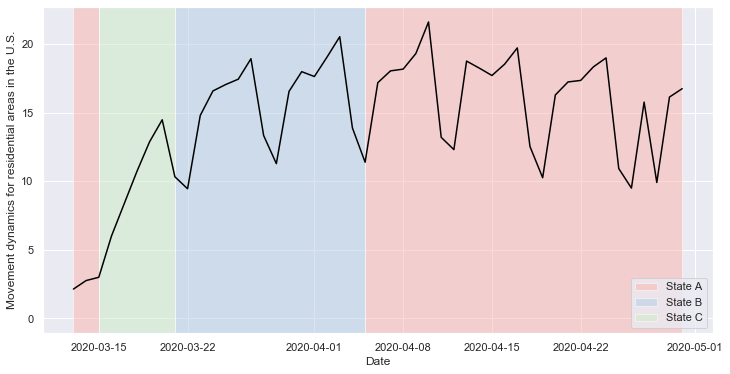

In [213]:
cmap = plt.get_cmap('Pastel1')
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Movement dynamics for residential areas in the U.S.')
ax.set_title('')
ax.grid(True)

ax.plot(states1.mean_residents_US, color='black')
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
name=['A','B','C']
for i, color in enumerate(cmap([0, 1, 2])):
    ax.fill_between(states.index,  0, 1, where=states['states']==i, facecolor=color, alpha = 0.5, transform=trans, label = 'State {n}'.format(n=name[i]))
    ax.legend(loc = 'lower right')

plt.savefig('final\Movement dynamics for residential areas in the U.S.png')
plt.show()

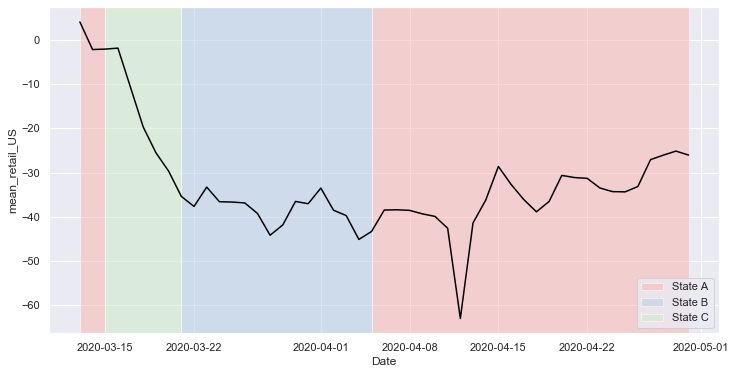

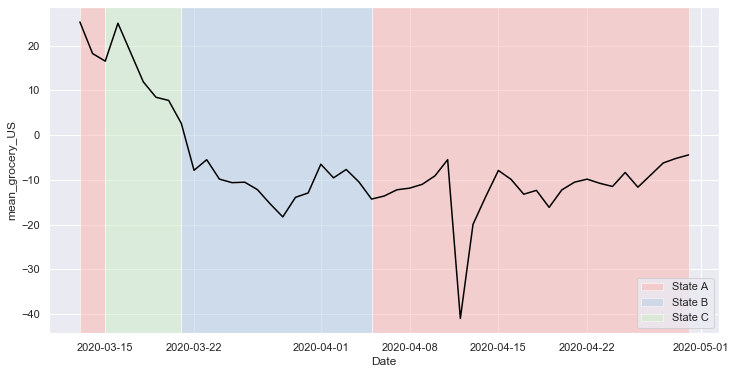

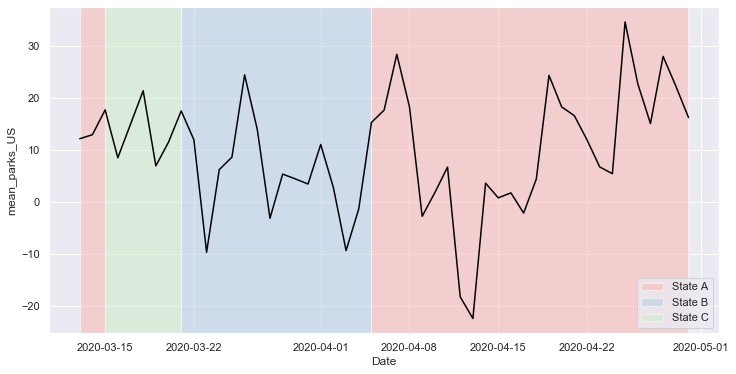

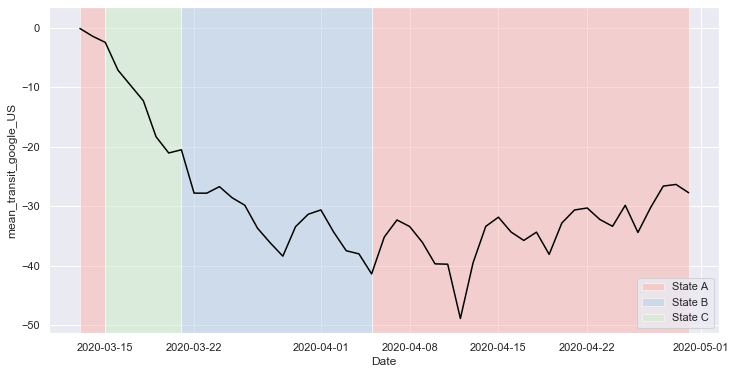

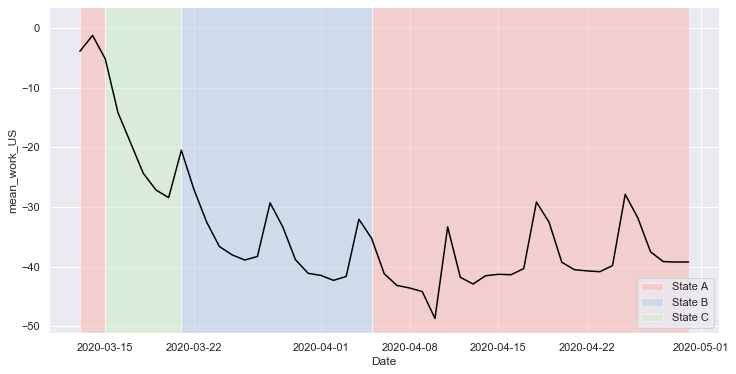

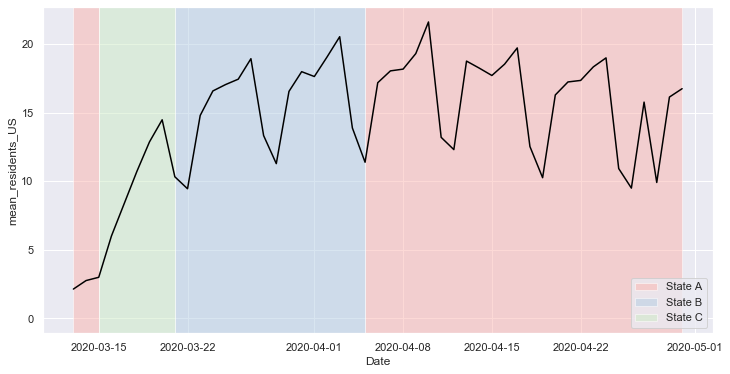

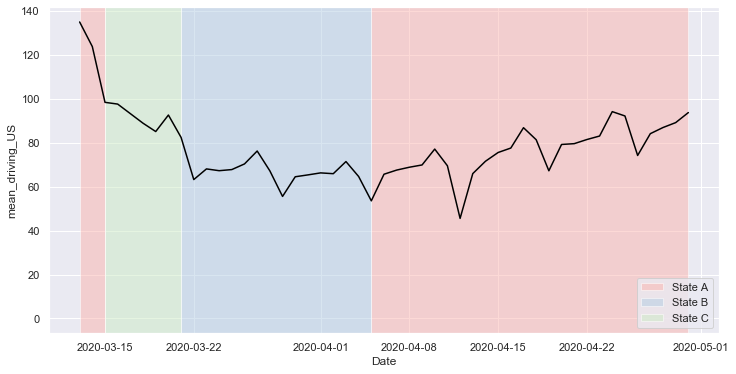

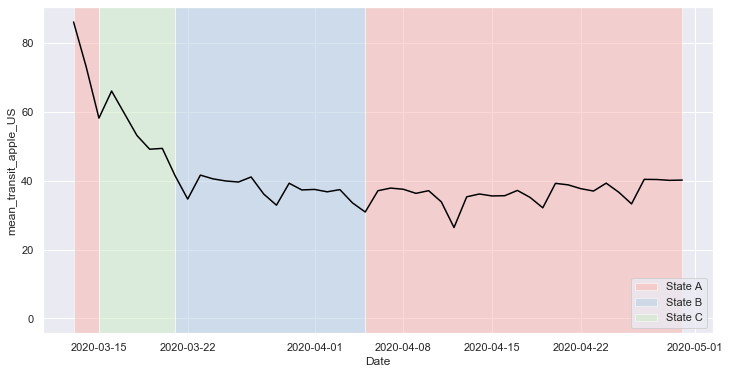

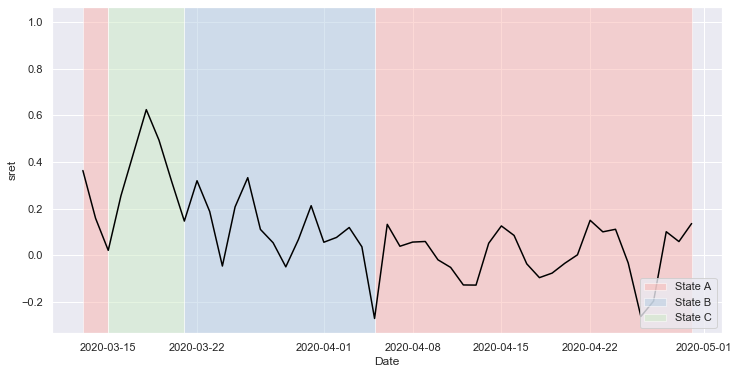

In [209]:
for i in ft_cols1:
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    ax.set_xlabel('Date')
    ax.set_ylabel('{n}'.format(n=i))
    ax.set_title('')
    ax.grid(True)

    ax.plot(states1[i], color='black')
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    name=['A','B','C']
    for i, color in enumerate(cmap([0, 1, 2])):
        ax.fill_between(states.index,  0, 1, where=states['states']==i, facecolor=color, alpha = 0.5, transform=trans, label = 'State {n}'.format(n=name[i]))
        ax.legend(loc = 'lower right')

    # plt.savefig('final\mean_transit_apple in the U.S.png')
    plt.show()

In [66]:
# for i in ['Confirmed_new_US']:
#     sns.set_style('white', style_kwds)
#     order = [0, 1, 2]
#     fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
#                        palette=colors, aspect=1.31, size=12)
#     plt.grid(True)
#     fg.map(plt.scatter, 'Date', i, alpha=0.8).add_legend()
# #    sns.despine(offset=10)
#     fg.fig.suptitle("{0}".format(i), fontsize=12, fontweight='demi')
# #    fg.savefig('ft_cols\{0}.png'.format(i))

In [38]:
# plt.figure(figsize=(12, 6))
# plt.plot(states.loc[states['states']==0].Confirmed_new_US, label='0')
# plt.plot(states.loc[states['states']==1].Confirmed_new_US, label='1')
# plt.plot(states.loc[states['states']==2].Confirmed_new_US, label='2')
# # plt.plot(states.Confirmed_new_US)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Confirmed_new_US', fontsize=14)
# plt.grid(True)
# plt.legend()
# plt.show() 